<a href="https://colab.research.google.com/github/KinataDewa/PCVK_Genap_2024/blob/main/modul10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

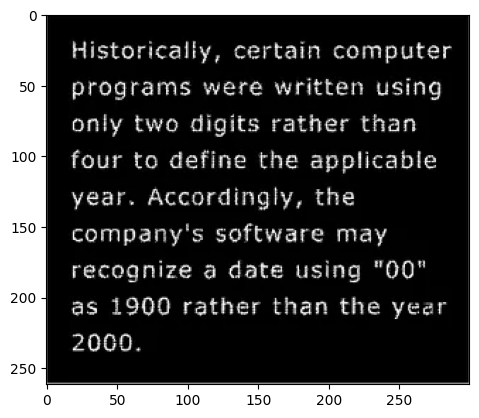

In [5]:
image = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')
plt.show()

In [7]:
# Define the structuring element (SED) - 3x3 cross
structuring_element = np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]])

In [8]:
def dilation(image, struct_element):
    # Get dimensions of the image and structuring element
    img_h, img_w = image.shape
    se_h, se_w = struct_element.shape
    pad_h, pad_w = se_h // 2, se_w // 2

    # Create a padded version of the image to apply dilation at borders
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Prepare the output image
    dilated_image = np.zeros_like(image)

    # Perform dilation
    for i in range(pad_h, img_h + pad_h):
        for j in range(pad_w, img_w + pad_w):
            # Extract the region of interest (ROI)
            roi = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

            # Apply dilation (max value where structuring element is 1)
            dilated_image[i - pad_h, j - pad_w] = np.max(roi[struct_element == 1])

    return dilated_image

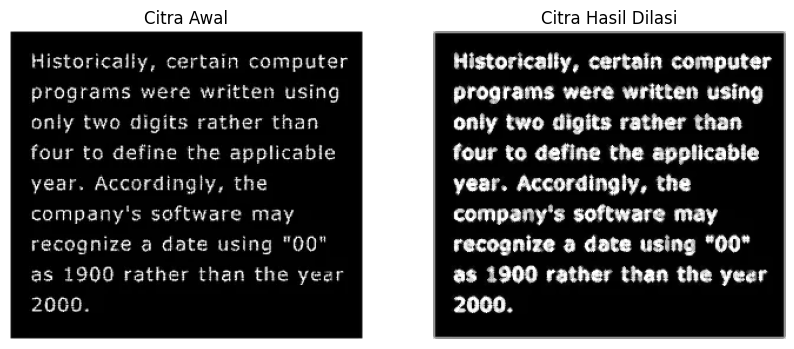

In [9]:
# Apply the dilation function
dilated_image = dilation(image, structuring_element)

# Plot the original and dilated images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()